In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#tf.enable_eager_execution()

In [2]:
def create_placeholders():
    X = tf.placeholder(dtype=tf.float32, shape=[], name="X")
    Y = tf.placeholder(dtype=tf.float32, shape=[], name="Y")
    return X,Y

In [3]:
def initialize_parameters():  
    tf.set_random_seed(1)                   
    W = tf.get_variable("W",[],initializer=tf.initializers.random_normal())
    parameters = {"W": W}
    return parameters

In [4]:
def forward_propagation(X, parameters):
    W = parameters['W']    
    Z = tf.math.pow(W, 2)  
    return Z

In [5]:
def compute_cost(Z, Y):
    CV   = tf.math.pow((Z-Y),2) 
    cost = tf.reduce_mean(CV)
    return cost

In [6]:
def backward_propagation(cost, learning_rate):
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    return optimizer

In [7]:
def model(X_train, Y_train, learning_rate, iterations):
    
    #tf.reset_default_graph() 
    costs = []                                        # To keep track of the cost

    X, Y = create_placeholders()

    # Initialize parameters
    parameters = initialize_parameters()

    # Forward propagation
    Z = forward_propagation(X, parameters)

    # Cost function
    cost = compute_cost(Z, Y)

    # Backpropagation
    op = backward_propagation(cost,learning_rate=learning_rate)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer()) # Initialize all the variables
        for i in range(iterations):       
            _ , c = sess.run([op, cost],feed_dict={X: X_train, Y: Y_train})                

            costs.append(c)
        parameters = sess.run(parameters)  #Evaluate Values  

    return parameters,costs

In [8]:
def FindSQRT(SqRootOf,printModel=False):
    X=0
    Y=SqRootOf
    parameters,costs =model(X,Y,0.01,1200)
    SQRTValue=np.round(np.squeeze(parameters["W"]),2)
    
    if(printModel==True):
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title("SQRT("+str(SqRootOf)+")  =" + str(SQRTValue))
        plt.show()

    return SQRTValue
    

Instructions for updating:
Colocations handled automatically by placer.


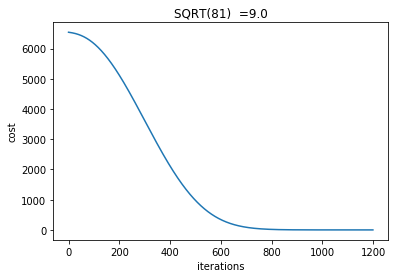

9.0


In [9]:
print(FindSQRT(81,True))